In [1]:
#Preprocess the moon data. Basically, the moon data is cropped three times with 
#different resolution of small cells, to detect craters in larger ranges. For example, if 
#we crop image into 256*256 small cells. Corresponding label for each cell will only have labels of craters with diameter<10km.

In [2]:
from matplotlib import pyplot as plt
from PIL import Image,ImageFilter,ImageOps
from numpy import asarray
import matplotlib.patches as patches

In [3]:
Image.MAX_IMAGE_PIXELS = 3723856950 #so can read large size image

In [4]:
# if you donot have the Moon_WAC_Training file parallel to this code. Do not run the code.
ls

Mars_THEMIS_Training/ Untitled.ipynb        test/
Moon_WAC_Training/    cropped/
README.md             size_path2path.ipynb


In [5]:
cd Moon_WAC_Training/images

/Users/sm1122/iCloud Drive (Archive)/Documents/IC/sync/Group_p/acds-moonshot-xenophanes/Moon_WAC_Training/images


In [6]:
inames = ['Lunar_A.jpg','Lunar_B.jpg','Lunar_C.jpg','Lunar_D.jpg']

In [7]:
images = []
for i in inames:
    image = Image.open(i)
    data = asarray(image)
    images.append(data)

In [ ]:
## investigate the pictures
# fig, axes = plt.subplots(2,2,figsize=(16,9))
# ax = axes.flatten()
# for i in range(4):
#     ax[i].imshow(images[i],cmap='Greys')
#     ax[i].set_title(f'{i}')
#     ax[i].label_outer()
# plt.tight_layout()

In [8]:
# conbine into a large one
left = np.concatenate((images[1], images[0]), axis=0)
right = np.concatenate((images[3], images[2]), axis=0)
large =  np.concatenate((left, right), axis=1)

In [9]:
# read labels

In [10]:
%cd ..
%cd labels/

/Users/sm1122/iCloud Drive (Archive)/Documents/IC/sync/Group_p/acds-moonshot-xenophanes/Moon_WAC_Training
/Users/sm1122/iCloud Drive (Archive)/Documents/IC/sync/Group_p/acds-moonshot-xenophanes/Moon_WAC_Training/labels


In [11]:
import pandas as pd
labels = pd.read_csv('lunar_crater_database_robbins_train.csv')

In [12]:
moon_labels = labels.drop(columns = labels.columns[0:2])

In [13]:
#Use the data of the circle method determined crater
moon_labels_1 = moon_labels[['LAT_CIRC_IMG','LON_CIRC_IMG','DIAM_CIRC_IMG']]

In [17]:
def lat_lon_km2pix(lat,lon,r,origin_lat,origin_lon,lat_span=90,lon_span=180,shape=large.T.shape):
    ''''''
    
    moon_r = 1737.4  # in km
    lat_ = -(lat-origin_lat)
    lon_ = lon-origin_lon
    if not np.array((lat_>=0)&(lat_>=0)).all():
        print('Input maybe wrong')
        
    x_pixels = shape[0]
    y_pixels = shape[1]
    
    x_pixpkm = (lon_span/360)*2*np.pi*moon_r*np.abs(np.cos(np.radians(lat)))/x_pixels  #try np.cos(19) and np.cos(19.123)
    
    y_pixpkm = (lat_span/180)*np.pi*moon_r/y_pixels
    return lon_*x_pixels/lon_span, lat_*y_pixels/lat_span, r/x_pixpkm, r/y_pixpkm

In [18]:
moon_labels_1['X'],moon_labels_1['Y'],moon_labels_1['W'],moon_labels_1['H'] = lat_lon_km2pix(moon_labels_1['LAT_CIRC_IMG'],moon_labels_1['LON_CIRC_IMG'],moon_labels_1['DIAM_CIRC_IMG'],origin_lat=45,origin_lon=(-180))

/var/folders/wb/x375xcqd3p31cgn8w1m_xggm0000gp/T/ipykernel_45979/955628315.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moon_labels_1['X'],moon_labels_1['Y'],moon_labels_1['W'],moon_labels_1['H'] = lat_lon_km2pix(moon_labels_1['LAT_CIRC_IMG'],moon_labels_1['LON_CIRC_IMG'],moon_labels_1['DIAM_CIRC_IMG'],origin_lat=45,origin_lon=(-180))


(array([3.2165e+05, 4.4000e+01, 2.0000e+00, 4.0000e+00, 2.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.000000e+00, 1.207390e+02, 2.404780e+02, 3.602170e+02,
        4.799560e+02, 5.996950e+02, 7.194340e+02, 8.391730e+02,
        9.589120e+02, 1.078651e+03, 1.198390e+03]),
 <BarContainer object of 10 artists>)

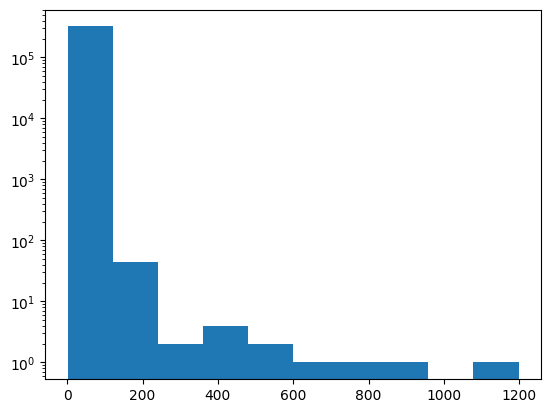

In [19]:
# data balance bloody nightmare 
plt.hist(moon_labels_1.DIAM_CIRC_IMG,log=True)

In [22]:
#The code below is to focus on the large cut method (4096*4096). Cut the cells such that the large craters are located at center

In [23]:
moon_labels1_4 = moon_labels_1[(moon_labels_1.DIAM_CIRC_IMG>=100) & (moon_labels_1.DIAM_CIRC_IMG<=350)]

In [24]:
moon_labels1_4['x'] = 0.5
moon_labels1_4['y'] = 0.5
moon_labels1_4['w'] = moon_labels1_4.W/4096
moon_labels1_4['h'] = moon_labels1_4.H/4096

/var/folders/wb/x375xcqd3p31cgn8w1m_xggm0000gp/T/ipykernel_45979/1613007738.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moon_labels1_4['x'] = 0.5
/var/folders/wb/x375xcqd3p31cgn8w1m_xggm0000gp/T/ipykernel_45979/1613007738.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moon_labels1_4['y'] = 0.5
/var/folders/wb/x375xcqd3p31cgn8w1m_xggm0000gp/T/ipykernel_45979/1613007738.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

In [25]:
cells1_4 = []
for n in range(len(moon_labels1_4)):
    x_,y_,w,h = moon_labels1_4.iloc[n].X,moon_labels1_4.iloc[n].Y,moon_labels1_4.iloc[n].W,moon_labels1_4.iloc[n].H
    lis = [int(x_-2048),int(x_+2048),int(y_-2048),int(y_+2048)]
    cell = large[lis[2]:lis[3],lis[0]:lis[1]]
    cells1_4.append(cell)
    

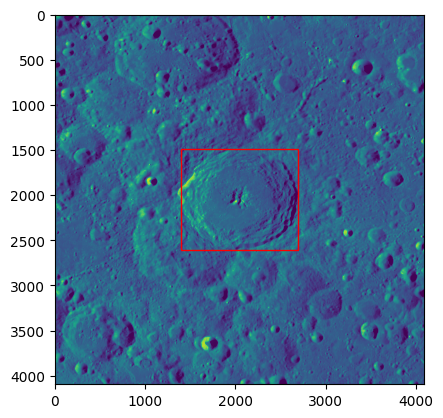

In [32]:
# An example of this kind of cut
n = 10
plt.imshow(cells1_4[n])
x_,y_,w,h = moon_labels1_4.iloc[n].x,moon_labels1_4.iloc[n].y,moon_labels1_4.iloc[n].w,moon_labels1_4.iloc[n].h
x_,y_ = 0.5,0.5
x_,y_ = x_-0.5*w, y_-0.5*h 
x_,y_,w,h = x_*4096,y_*4096,w*4096,h*4096
rect = patches.Rectangle((x_,y_), width=w, height=h, linewidth=1, edgecolor='r', facecolor='none')
plt.gca().add_patch(rect)

In [27]:
##As the large cut do not have enough large craters (labels). This cell try to augument the image by blur and flip.
##But it just turns out that the augmentation barely improve large model. So forthe yolo5, only 70+ labels and 
##the data augmented from the labels are far from enough.

# abc = Image.fromarray(cells1_4[1]).filter(ImageFilter.GaussianBlur(radius=5))
# abc.show()
# abc = Image.fromarray(cells1_4[1]).transpose(Image.FLIP_LEFT_RIGHT)
# abc.show()
# abc = Image.fromarray(cells1_4[1]).transpose(Image.FLIP_TOP_BOTTOM)
# abc.show()

# b_img=[]
# for i in cells1_4:
#     blurred = Image.fromarray(i).filter(ImageFilter.BLUR)
#     b_img.append(blurred)

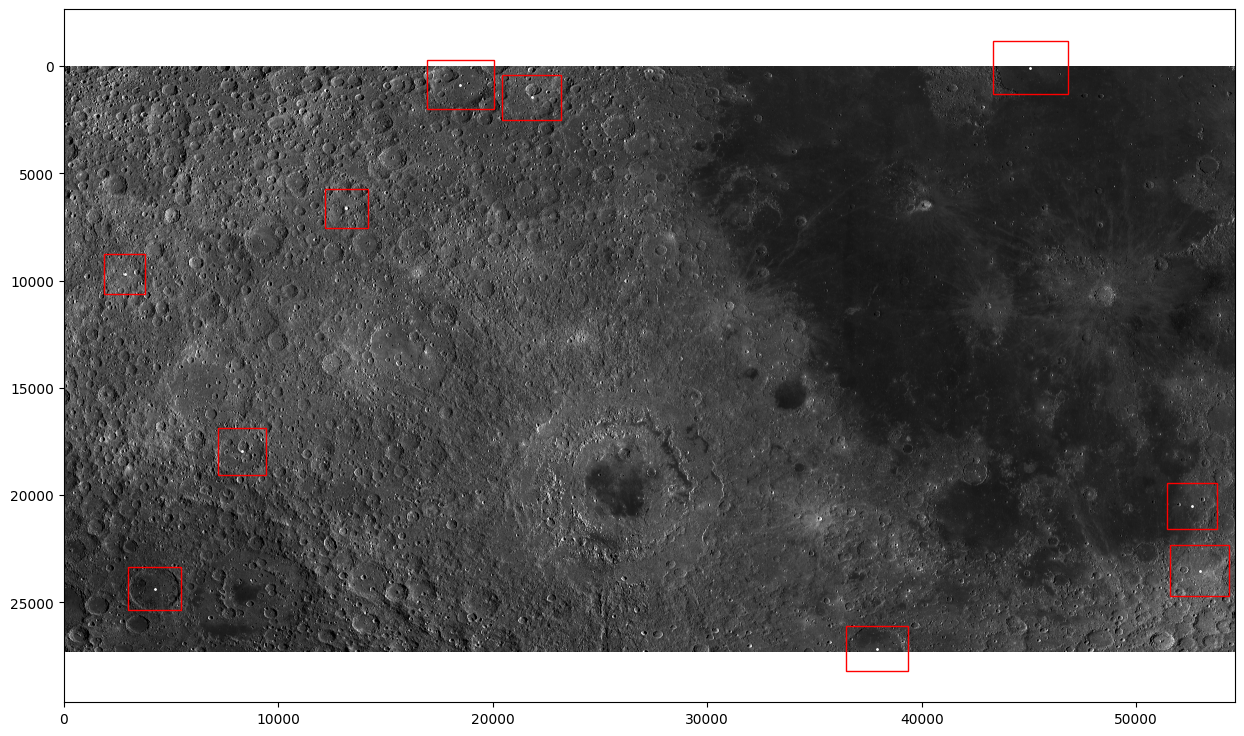

In [75]:
# try to plot some craters size~100. Some of them can barely be visually identified
moon_labels1_4 = moon_labels1_4.sort_values(by='DIAM_CIRC_IMG',ascending=False)
plt.figure(figsize=(16,9))
plt.imshow(large,cmap='gray')
for i in range(10):
    
    x_,y_,w,h = moon_labels1_4.iloc[i].X, moon_labels1_4.iloc[i].Y, moon_labels1_4.iloc[i].W,moon_labels1_4.iloc[i].H
    plt.scatter(x_,y_,color='white',s=1)
    
    x_,y_ = x_-0.5*w, y_-0.5*h 
    rect = patches.Rectangle((x_,y_), width=w, height=h, linewidth=1, edgecolor='r', facecolor='none')
    plt.gca().add_patch(rect)

In [34]:
def bigimgpix2cellpix(img,df_,res_x=416,res_y=416): 
    '''The function to cut the large image into small cells
    
        Parameters
    ----------
    img : np.array
        cropped image
    df_ : pd.DataFrame
        shall contain column X,Y,W,H which are the craters in pixels
    res_x,res_y : int
        size of the small cells 
        
    Returns
    -------
    tiles : list of np.array
        the cells
    x,y,w,h : float64
        proportion position on small cells. center x,y and box lenth,width
        
    indexes : list of int
        the number of the cells, in a left to right, top to bottom order
    '''     
    df=df_.copy()
    shape=img.T.shape
    cell_x,cell_y = shape[0]//res_x, shape[1]//res_y
    df = df[(df.X<=cell_x * res_x)&(df.Y<=cell_y * res_y)]
    X,Y,W,H = df['X'],df['Y'],df['W'],df['H']
    x = (X-( (X//res_x) * res_x ))/res_x
    y = (Y-( (Y//res_x) * res_y ))/res_y
    w = W/res_x
    h = H/res_y
    indexes = (Y//res_y)*cell_x + X//res_x + 1
    # Here the remainder dropped, can use fillvalue instead(augmented to a little bit larger picture). Not know which one better
    tiles = [img[i:i+res_x,j:j+res_y] for i in range(0,cell_y * res_y,res_y) for j in range(0,cell_x * res_x,res_x)]# first rightward, then downward
    return tiles,x,y,w,h,indexes

In [36]:
#crop the image in 4 times in 4 small cell sizes.
# the 256 cut and 2**14 cut are not used to train the final model

X,Y,W,H = moon_labels_1['X'],moon_labels_1['Y'],moon_labels_1['W'],moon_labels_1['H']

moon_labels_8, moon_labels_11, moon_labels_14 = moon_labels_1.copy(),moon_labels_1.copy(),moon_labels_1.copy()
moon_labels_416 = moon_labels_1.copy()
res_x,res_y=2**8,2**8 # please keep the res_x and res_y the same
cells8, x,y,w,h,labels = bigimgpix2cellpix(large,moon_labels_1,res_x=res_x,res_y=res_y)
moon_labels_8['x'],moon_labels_8['y'],moon_labels_8['w'],moon_labels_8['h'],moon_labels_8['labels'], = x,y,w,h,labels

res_x,res_y=2**11,2**11
cells11, x,y,w,h,labels = bigimgpix2cellpix(large,moon_labels_1,res_x=res_x,res_y=res_y)
moon_labels_11['x'],moon_labels_11['y'],moon_labels_11['w'],moon_labels_11['h'],moon_labels_11['labels'], = x,y,w,h,labels

res_x,res_y=2**14,2**14
cells14, x,y,w,h,labels = bigimgpix2cellpix(large,moon_labels_1,res_x=res_x,res_y=res_y)
moon_labels_14['x'],moon_labels_14['y'],moon_labels_14['w'],moon_labels_14['h'],moon_labels_14['labels'], = x,y,w,h,labels


res_x,res_y=416,416
cells416, x,y,w,h,labels = bigimgpix2cellpix(large,moon_labels_1,res_x=res_x,res_y=res_y)
moon_labels_416['x'],moon_labels_416['y'],moon_labels_416['w'],moon_labels_416['h'],moon_labels_416['labels'], = x,y,w,h,labels


In [41]:
# slice the label. e.g. large cell only has large crater label
moon_labels_8 = moon_labels_8[moon_labels_8.DIAM_CIRC_IMG<=10]
moon_labels_11 = moon_labels_11[(moon_labels_11.DIAM_CIRC_IMG<=100)&(moon_labels_11.DIAM_CIRC_IMG>10)]
moon_labels_14 = moon_labels_14[moon_labels_14.DIAM_CIRC_IMG>100]
moon_labels_416 = moon_labels_416[moon_labels_416.DIAM_CIRC_IMG<10]

In [38]:
# to address the outboundary crater in each cell. Keep the incell area and adjust the center point accordingly

delta = 0.00000001  #in caution

def wh2lr(x, y, w, h):
    '''center location and width, height of box to the location of the top left and bottom right of that box'''
    x1 = x - w/2
    x2 = x + w/2
    y1 = y - h/2
    y2 = y + h/2
    return x1, y1, x2, y2
 
def lr2wh(x1, y1, x2, y2):
    '''location of the top left and bottom right of a box to center location and width, height of box '''
    x = (x2 + x1)/2
    y = (y2 + y1)/2
    w = x2 - x1
    h = y2 - y1
    return x, y, w, h
 
def out_boun(x1, y1, x2, y2):
    '''slice the box and center location, only leave the part in the cell. inputs are top left and bot-right location'''
    if x1 > 1:
        x1 = 1-delta
    elif x1 < 0:
        x1 = 0+delta

    if x2 > 1:
        x2 = 1-delta
    elif x2 < 0:
        x2 = 0+delta

    if y1 > 1:
        y1 = 1-delta
    elif y1 < 0:
        y1 = 0+delta

    if y2 > 1:
        y2 = 1-delta
    elif y2 < 0:
        y2 = 0+delta

    return x1, y1, x2, y2

def suit2bound(df):
    df_ = df.copy().dropna()
    for i in range(len(df_)):
        abc = df_.iloc[i]
        x,y,w,h = abc.x,abc.y,abc.w,abc.h
        x1, y1, x2, y2 = wh2lr(x, y, w, h)
        x1, y1, x2, y2 = out_boun(x1, y1, x2, y2)
        x, y, w, h = lr2wh(x1, y1, x2, y2)
        df_.iloc[i].x,df_.iloc[i].y,df_.iloc[i].w,df_.iloc[i].h = x,y,w,h
    return df_

In [39]:
# this is added, the output of which are used as the train data for the large scale model.
res_x,res_y=4096,4096
moon_labels_4096 = moon_labels_1.copy()
cells4096, x,y,w,h,labels = bigimgpix2cellpix(large,moon_labels_1,res_x=res_x,res_y=res_y)
moon_labels_4096['x'],moon_labels_4096['y'],moon_labels_4096['w'],moon_labels_4096['h'],moon_labels_4096['labels'], = x,y,w,h,labels
moon_labels_4096 = moon_labels_4096[moon_labels_4096.DIAM_CIRC_IMG>100]
moon_labels_4096_ = suit2bound(moon_labels_4096)

In [40]:
moon_labels_416_ = suit2bound(moon_labels_416)
moon_labels_11_ = suit2bound(moon_labels_11)
moon_labels_14_ = suit2bound(moon_labels_14)

In [54]:
# inspect the output
moon_labels_11_

,LAT_CIRC_IMG,LON_CIRC_IMG,DIAM_CIRC_IMG,X,Y,W,H,x,y,w,h,labels
13,44.71840,-175.997,17.4180,1213.843033,85.390507,245.125789,174.179902,0.592697,0.042109,0.119690,0.084219,1.0
14,44.44450,-171.271,17.7064,2646.923767,168.446117,248.013299,177.063900,0.292443,0.082249,0.121100,0.086457,2.0
15,44.76670,-170.932,11.0089,2749.719867,70.744337,155.059178,110.088938,0.342637,0.034543,0.075712,0.053754,2.0
16,43.82190,-175.878,17.5077,1249.927800,357.239190,242.658301,175.076901,0.610316,0.174433,0.118485,0.085487,1.0
17,43.88810,-175.040,13.5120,1504.037333,337.165143,187.485556,135.119924,0.734393,0.164631,0.091546,0.065977,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
320811,-26.42380,-66.662,42.0768,34367.859533,21658.076953,469.854922,420.767763,0.781181,0.575233,0.229421,0.205453,277.0
321597,-35.50980,-59.507,18.5510,36537.494033,24413.255020,227.894604,185.509895,0.840573,0.920535,0.111277,0.090581,304.0
321602,-33.07160,-63.722,53.0841,35259.365533,23673.911507,633.469544,530.840701,0.216487,0.559527,0.309311,0.259200,304.0
321691,-13.29650,-30.075,10.0081,45462.257500,17677.442017,102.837722,100.080944,0.198368,0.631563,0.050214,0.048868,231.0


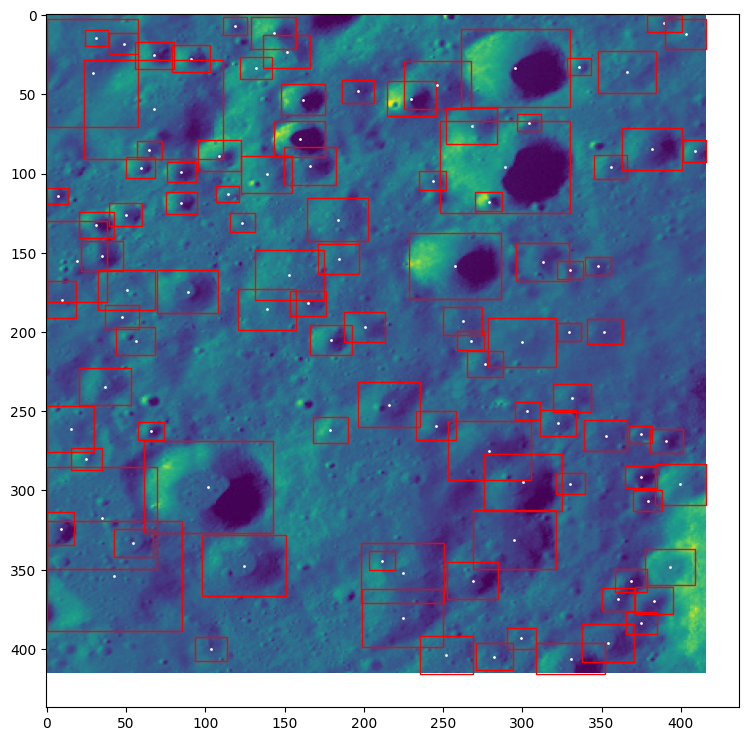

In [42]:
# an illustration of the 416 cut cell. the data looks well.
n = 10
res_x,res_y=416,416
# res_x,res_y=2**416,2**416
cell = moon_labels_416_[moon_labels_416_.labels==n]
plt.figure(figsize=(16,9))
plt.imshow(cells416[n-1])
for i in range(len(cell)):
    x_,y_,w,h = cell.iloc[i].x, cell.iloc[i].y, cell.iloc[i].w, cell.iloc[i].h
#     plt.scatter(y_*res_y,x_*res_x, color = 'white',s=1)
    plt.scatter(x_*res_x,y_*res_y, color = 'white',s=1)
    x_,y_ = (x_-0.5*w)*res_x, (y_-0.5*h)*res_y 
    rect = patches.Rectangle((x_,y_), width=w*res_x, height=h*res_y, linewidth=1, edgecolor='r', facecolor='none')
    plt.gca().add_patch(rect)

In [ ]:
# store data. If you want to run it, creat the corresponding folder first.

In [43]:
%cd ..

/Users/sm1122/iCloud Drive (Archive)/Documents/IC/sync/Group_p/acds-moonshot-xenophanes/Moon_WAC_Training


In [44]:
ls

16384/            4096/             foo.csv           readme.txt
2048/             416/              images/
256/              Prepared_416_416/ labels/


In [ ]:
# In conclusion, cut in 3 scales are used. 416, 2048 and 4096. For the 4096 one, the craters were both cut in a 
# slicing window and in center-located

In [83]:
for i in range(len(cells416)):
    target = moon_labels_416_[moon_labels_416_.labels==(i+1)][['x','y','w','h']].reset_index(drop=True)
    if target.index.stop != 0:
        
        target.to_csv(f'416/labels/cell{i+1}.csv', index=False, header=None)
        img = Image.fromarray(cells416[i])
        img.save(f'416/images/cell{i+1}.png')

In [79]:
for i in range(len(cells11)):
    target = moon_labels_11_[moon_labels_11_.labels==(i+1)][['x','y','w','h']].reset_index(drop=True)
    if target.index.stop != 0:
        target.to_csv(f'2048/labels/cell{i+1}.csv', index=False,header=None)
        img = Image.fromarray(cells11[i])
        img.save(f'2048/images/cell{i+1}.png')

In [275]:
# for i in range(len(cells14)):
#     target = moon_labels_14_[moon_labels_14_.labels==(i+1)][['x','y','w','h']].reset_index(drop=True)
#     if target.index.stop != 0:
#         target.to_csv(f'16384/labels/cell{i+1}.csv', index=False,header=None)
#         img = Image.fromarray(cells14[i])
#         img.save(f'16384/images/cell{i+1}.png')

In [84]:
for i in range(len(cells4096)):
    target = moon_labels_4096_[moon_labels_4096_.labels==(i+1)][['x','y','w','h']].reset_index(drop=True)
    if target.index.stop != 0:
        target.to_csv(f'4096/labels/cell{i+1}.csv', index=False,header=None)
#         img = Image.fromarray(cells4096[i])
#         img.save(f'4096/images/cell{i+1}.png')

In [ ]:
for i in range(len(cells1_4)):
    target = moon_labels1_4[['x','y','w','h']].iloc[i:i+1].reset_index(drop=True)
    if cells1_4[i].shape[0]>0 and cells1_4[i].shape[1]>0:
        img = Image.fromarray(cells1_4[i])
        img.save(f'4096/images/new{i+1}.png')
        target.to_csv(f'4096/labels/new{i+1}.csv', index=False, header=None)